## NA HW 12
---
Student 林之然(B11209005) and 蔡知諺(B11209014), both in department 大氣系 and grade 1.

    A+: 答案正確，討論得很詳細。
    

<font face='Times New Roman' size=4>
<span style="line-height: 1.25;">

### Instruction to this Jupyter Notebook:
1. Assign the kernel where you normally run Python.  

2. Click the [<font face="標楷體">全部執行</font>] button or Cell > Run All to execute the entire code. 

3. Look through the codes and discussions.  

4. If the discussion text is not displayed properly (e.g. the line height is too short for read), please find the attached .html file.

<font face='Times New Roman' size=4>
<span style="line-height: 1.25;">

#### Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt


<font face='Times New Roman' size=4>
<span style="line-height: 1.25;">

### Set constants

In [2]:
h = 0.05        # (m-2)
sigma = 2.7e-9  # (K-3m-2)
L = 10          # (m)
Tinf = 200      # (K)
T0 = 300        # (K)
TL = 400        # (K)

<font face='Times New Roman' size=4>
<span style="line-height: 1.25;">

### Q1 Boundary value problem

<font face='Times New Roman' size=4>
<span style="line-height: 1.25;">

#### Set basic arrays

In [3]:
n = 10
X = np.linspace(0,L,n+1)
dX = (L-0)/(n)
T = np.linspace(T0,TL,n+1)

<font face='Times New Roman' size=4>
<span style="line-height: 1.25;">

#### Calculation

With a new nonlinear part added to the equation, the matrix (only for solving linear problem) can not be used. Putting the nonlinear part $\sigma(T^4_\infty-T^4)$ to the right hand side, we use the modified Gauss-Seidel Method given in the lecture to iterate and approach the answer instead. 

In [4]:
Trel = np.ones(n+1)
RHS = sigma*(T**4-Tinf**4)-(dX**2*h*Tinf)
while(Trel.any()>=1e-6):
    Told = T.copy()
    factor = -(2+dX**2*h)
    for i in range(1,n):
        T[i] = (+RHS[i]-T[i-1]-T[i+1])/factor
    Tnew = T.copy()
    RHS = sigma*(T**4-Tinf**4)
    Trel = Tnew-Told

<font face='Times New Roman' size=4>
<span style="line-height: 1.25;">

#### Result
The result is in the graph below.

Text(0, 0.5, 'T (K)')

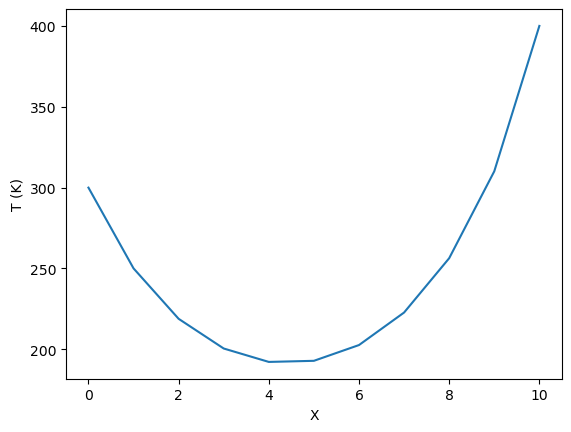

In [5]:
plt.plot(X,T,"-")
plt.xlabel("X")
plt.ylabel("T (K)")

<font face='Times New Roman' size=4>
<span style="line-height: 1.25;">

#### Discussion

The physical mechanism described in the equation involves the transfer of heat through multiple mechanisms, including conduction, convection, and radiation. In addition to convection, the pin fin is subject to radiative heat transfer, which influences the heat transfer from the fin to the fluid. The inclusion of radiation introduces a nonlinear effect to the temperature distribution along the fin.

The equation itself remains a second-order ordinary differential equation (ODE) that describes the temperature distribution along the length of the fin ($\small 0 ≤ x ≤ L$). However, the term $\small h(T - T_s)$ now accounts for both convective and radiative heat transfer, where $\small T$ represents the temperature of the fin, $\small T_s$ is the temperature of the surrounding fluid (in this case, $\small T_{\text{inf}} = 200 , \text{K}$), and $\small h$ is the convective heat transfer coefficient.

Taking into consideration the influence of radiation, the temperature gradient along the fin becomes nonlinear. As $\small x$ increases, indicating a position along the length of the pin fin, the temperature no longer follows a simple straight-line pattern of decrease. Instead, the presence of radiative heat transfer causes a more complex temperature distribution.

Radiation introduces an additional mechanism by which heat is transferred from the fin to the surroundings. As the fin extends along its length, the heat loss due to radiation increases. This results in a more significant temperature drop towards the cooler end ($\small x = L$) compared to a purely convective analysis.

To analyze the effect of radiation, we need to incorporate the appropriate radiative heat transfer coefficient and the Stefan-Boltzmann constant, $\small \sigma$. The radiative term in the equation becomes $\small \sigma(T^4 - T_{\text{inf}}^4)$. The coefficient $\small \sigma$ is a fundamental constant ($\small 2.7 \times 10^{-9} , \text{K}^{-3}\text{m}^{-2}$), and it captures the radiative properties of the fin's surface.

By considering radiation, the temperature distribution along the fin becomes nonlinear, deviating from a simple linear relationship. The effects of radiative heat transfer can significantly influence the temperature profile, especially towards the cooler end. Therefore, including radiation in the analysis is crucial for obtaining an accurate understanding of the temperature distribution and heat transfer in pin fins.

The boundary conditions for this analysis are $\small T(0) = T_0 = 300 , \text{K}$ and $\small T(L) = T_L = 400 , \text{K}$, which specify the temperatures at the two ends of the fin. These boundary conditions, along with the consideration of conduction, convection, and radiation, allow us to solve for the temperature at different positions along the fin and obtain a more realistic and comprehensive understanding of the heat transfer phenomenon.

### Q2

<font face='Times New Roman' size=4>
<span style="line-height: 1.25;">


#### Set perameters

The code initializes variables and parameters used in the simulation.
- 'D' represents the diffusion coefficient.
- 'dt' represents the time step size.
- 'dx' represents the spatial step size.
- 'T' represents the total simulation time, and T is modifed so that loop can repeat 1000 times.
- 'Nx' and 'Nt' are calculated based on the given values, representing the number of grid points in space and time.


In [6]:
D = 1
dt = 5e-5
dx = 0.02
T = 0.05
Nx = int(1 / dx) + 1  # 51
Nt = int(T / dt) + 1  # 1001

<font face='Times New Roman' size=4>
<span style="line-height: 1.25;">


#### Initialize grid

The code sets up the grid for the simulation. It creates a 2D numpy array 'u' of size (Nx, Nt) to store the distribution of the quantity 'u' over space and time.

It also creates a 1D numpy array 'x' representing the spatial positions.

The initial condition for 'u' is set using a Gaussian distribution centered at 0.5 with a standard deviation of 0.05.

In [7]:
# Initialize
u = np.zeros((Nx, Nt))
x = np.linspace(0, 1, Nx)
u[:, 0] = np.exp(-((x - 0.5) ** 2) / (2 * (0.05 ** 2))) / np.sqrt(2 * np.pi * (0.05 ** 2))

<font face='Times New Roman' size=4>
<span style="line-height: 1.25;">


#### Apply finite difference

The code applies the finite difference method to solve the diffusion equation iteratively over time.
It uses nested loops to update the values of 'u' at each time step and spatial position.
- The outer loop iterates over the time steps.
- The inner loop iterates over the spatial positions.

Inside the loops, the finite difference equation is used to update the values of 'u'.
It discretizes the second derivative in space using a *central difference approximation*.
The updated value of 'u' at (i, j+1) is calculated based on the values at (i+1, j), (i, j), and (i-1, j) using the diffusion coefficient 'D', time step size 'dt', and spatial step size 'dx'.


In [8]:
# Apply finite difference method
for j in range(Nt - 1):
    for i in range(1, Nx - 1):
        u[i, j + 1] = u[i, j] + D * (dt / dx ** 2) * (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j])

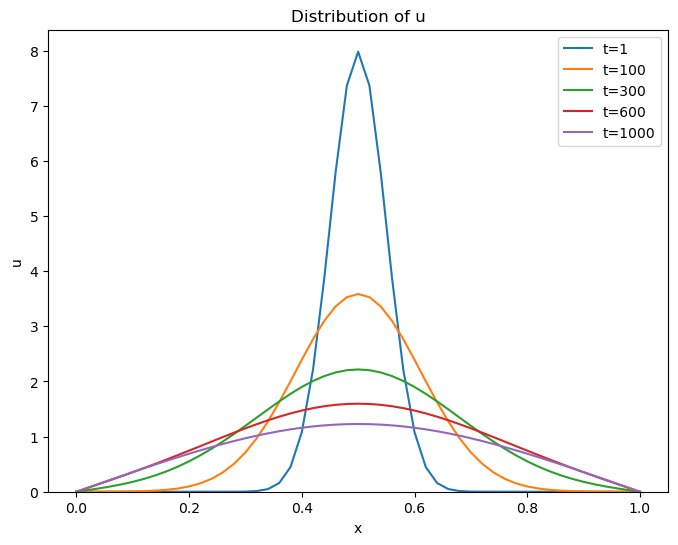

In [9]:
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, u[:,0], label='t=1')
plt.plot(x, u[:,99], label='t=100')
plt.plot(x, u[:,299], label='t=300')
plt.plot(x, u[:,599], label='t=600')
plt.plot(x, u[:,999], label='t=1000')
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(0,)
plt.title('Distribution of u')
plt.savefig('Diffusion.png', dpi = 500)
plt.legend()
plt.show()

<font face='Times New Roman' size=4>
<span style="line-height: 1.25;">

#### Discussion


The figure describes how the distribution of a quantity 'u' evolves over time in a 1D diffusion simulation. Initially, the distribution is centered around a peak value near 0.5. As time progresses, the diffusion process spreads 'u' outward from the initial peak, resulting in a wider and flatter distribution.

The diffusion rate is determined by the diffusion coefficient 'D', with a higher coefficient causing a faster spread of 'u' and a wider distribution at a given time step. The figure visually represents the evolution of the distribution of 'u' over time, allowing for comparisons between different time steps.

Overall, the figure provides a visual summary of the diffusion process, illustrating how 'u' spreads and changes its concentration or density throughout the spatial domain.